In [31]:
import numpy as np
import pandas as pd

import geopandas as gpd

import folium

from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

import matplotlib.pyplot as plt

In [18]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [19]:
catalog.list()


[
    'incidents',
    'firestations',
    'firestation_areas',
    'property_assessments',
    'census',
    'combined_incidents',
    'preprocessed_incidents',
    'preprocessed_firestations',
    'preprocessed_firestation_areas',
    'preprocessed_property_assessments',
    'preprocessed_census',
    'enhanced_incidents',
    'square_mesh',
    'spatial_joined_incidents',
    'spatial_joined_property_assessments',
    'spatial_joined_census',
    'merged_incidents_property_assessments',
    'merged_incidents_property_assessments_census',
    'input_table',
    'parameters',
    'params:square_size'
]

In [22]:
square_mesh = catalog.load('square_mesh')
census = catalog.load('census')

[06/27/24 22:53:40] INFO     Loading data from square_mesh (GeoJSONDataset)...                  ]8;id=842806;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=781518;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

[06/27/24 22:53:41] INFO     Loading data from census (GeoJSONDataset)...                       ]8;id=703439;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=175328;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [23]:
census.head()

,DGUID,Average size of census families,Population density per square kilometre,"Population, 2021",geometry
0,2021S051224660001,2.7,2113.0,651.0,"MULTIPOLYGON (((-73.47712 45.70179, -73.47719 ..."
1,2021S051224660002,2.9,5079.7,542.0,"POLYGON ((-73.48273 45.69698, -73.48283 45.696..."
2,2021S051224660003,2.8,5058.4,303.0,"POLYGON ((-73.48184 45.69763, -73.48414 45.697..."
3,2021S051224660004,2.5,3317.1,273.0,"POLYGON ((-73.48585 45.69453, -73.48544 45.694..."
4,2021S051224660005,2.8,3678.3,231.0,"POLYGON ((-73.48322 45.69175, -73.48450 45.690..."


In [24]:
census_gdf = gpd.GeoDataFrame(census, geometry= 'geometry')
mesh_gdf = gpd.GeoDataFrame(square_mesh, geometry= 'geometry')

In [25]:
census.describe()

,Average size of census families,Population density per square kilometre,"Population, 2021"
count,3213.000000,3228.000000,3228.000000
mean,2.890507,10496.437144,620.899938
std,0.307847,8192.051829,333.097000
min,2.100000,0.000000,0.000000
25%,2.700000,4656.700000,459.000000
50%,2.900000,9252.450000,551.000000
75%,3.100000,14124.350000,678.250000
max,5.800000,122189.800000,5845.000000


In [26]:
processed_census = catalog.load('preprocessed_census')

[06/27/24 22:54:56] INFO     Loading data from preprocessed_census (CSVDataset)...              ]8;id=669488;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=151002;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [37]:
processed_census[processed_census['Population density per square kilometre'] == 0]

,DGUID,Average size of census families,Population density per square kilometre,"Population, 2021",LONGITUDE,LATITUDE
1894,2021S051224662067,NaN,0.0,0.0,-73.549746,45.561850
2058,2021S051224662247,NaN,0.0,0.0,-73.742019,45.440745
3075,2021S051224663329,NaN,0.0,0.0,-73.562311,45.562102
3080,2021S051224663334,NaN,0.0,0.0,-73.568497,45.526206
3081,2021S051224663335,NaN,0.0,0.0,-73.530914,45.513738
3084,2021S051224663340,NaN,0.0,0.0,-73.628448,45.535090
3124,2021S051224663382,NaN,0.0,0.0,-73.602755,45.442443
3178,2021S051224663441,NaN,0.0,0.0,-73.550603,45.488776
3224,2021S051224663494,NaN,0.0,0.0,-73.679450,45.530257


In [27]:
processed_census_gdf = gpd.GeoDataFrame(processed_census, geometry=gpd.points_from_xy(processed_census.LONGITUDE, processed_census.LATITUDE))

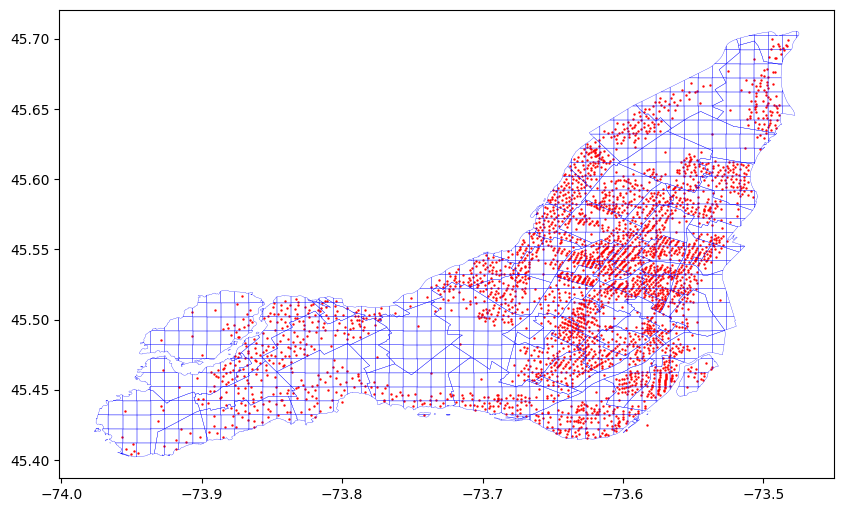

In [28]:
# Plot the result
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mesh_gdf.boundary.plot(ax=ax, color='blue', linewidth=0.2)
processed_census_gdf.plot(ax=ax, color='red', markersize=0.5, marker='o')
plt.show()

In [29]:
intersec_census = catalog.load('spatial_joined_census')

[06/27/24 22:57:37] INFO     Loading data from spatial_joined_census (CSVDataset)...            ]8;id=877969;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=694676;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [30]:
intersec_census.describe()

,Average size of census families,Population density per square kilometre,"Population, 2021",LONGITUDE,LATITUDE,index_mesh,grid_lat,grid_long
count,3207.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,2.890708,10510.063656,621.063315,-73.633149,45.526079,717.199876,45.526083,-73.633159
std,0.308065,8192.594204,333.246819,0.089508,0.059433,290.305719,0.059440,0.089572
min,2.100000,0.000000,0.000000,-73.957073,45.404149,5.000000,45.407513,-73.960841
25%,2.700000,4668.375000,459.000000,-73.653679,45.478840,550.000000,45.477274,-73.651538
50%,2.900000,9258.950000,551.000000,-73.614326,45.525621,719.000000,45.526913,-73.612049
75%,3.100000,14128.400000,678.750000,-73.576168,45.566886,935.000000,45.567149,-73.573835
max,5.800000,122189.800000,5845.000000,-73.482081,45.699526,1252.000000,45.697557,-73.482240


In [33]:
intersec_census = gpd.GeoDataFrame(processed_census, geometry=gpd.points_from_xy(processed_census.LONGITUDE, processed_census.LATITUDE))

In [34]:
# Calculate the mean latitude and longitude to center the map
mean_lat = intersec_census['LATITUDE'].mean()
mean_long = intersec_census['LONGITUDE'].mean()

# Create a Folium map centered on the mean latitude and longitude
m = folium.Map(location=[mean_lat, mean_long], zoom_start=12)

# Add points to the map
for _, row in intersec_census.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['name'] if 'name' in row else '',
    ).add_to(m)

In [35]:
m

<folium.folium.Map object at 0x000002BD0A37FCD0>